In [71]:
# Importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras import optimizers

#### Need to test if add features are benefitials 

In [140]:
df = pd.read_csv('../data/num_data.csv')

In [141]:
dataset = df[:1000]

In [142]:
dataset.shape

(1000, 16)

In [143]:
dataset.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
2013-03-01 00:00:00,2013,3,1,0,6.0,18.0,5.0,43.0,800.0,88.0,0.1,1021.1,-18.6,0.0,5.497787,4.4
2013-03-01 01:00:00,2013,3,1,1,6.0,15.0,5.0,43.0,800.0,88.0,-0.3,1021.5,-19.0,0.0,5.497787,4.0
2013-03-01 02:00:00,2013,3,1,2,5.0,18.0,7.0,43.0,700.0,52.0,-0.7,1021.5,-19.8,0.0,5.105088,4.6
2013-03-01 03:00:00,2013,3,1,3,6.0,20.0,6.0,43.0,900.0,45.0,-1.0,1022.7,-21.2,0.0,4.712389,2.8
2013-03-01 04:00:00,2013,3,1,4,5.0,17.0,5.0,43.0,600.0,73.0,-1.3,1023.0,-21.4,0.0,5.105088,3.6


In [144]:
# Some functions to help out with
def plot_predictions(test, predicted):
    plt.figure(figsize=(30, 15));

    plt.plot(test, color='red', label='Real PM2.5 Concentration',)
    plt.plot(predicted, color='blue', alpha=0.5, label='Predicted PM2.5 Concentation')
    plt.title('PM2.5 Concentration Prediction')
    plt.xlabel('Time')
    plt.ylabel('PM2.5  Concentration')
    plt.legend()
    plt.show()
    

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [166]:
train_size=int(dataset.shape[0] * 0.6)
test_size = int(dataset.shape[0] - train_size)

In [167]:
training_set = dataset[:train_size].iloc[:,4:16].values
test_set = dataset[train_size:].iloc[:,4:16].values

In [168]:
training_set.shape

(600, 12)

In [169]:
# # Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

In [170]:
# Since LSTMs store long term memory state, we create a data structure with 24 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
seq_len = 24
for i in range(seq_len, train_size):
    X_train.append(training_set_scaled[i-seq_len:i,:])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [171]:
# Since LSTMs store long term memory state, we create a data structure with 24 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_test = []
y_test = []

for i in range(seq_len, test_size):
    X_test.append(test_set_scaled[i-seq_len:i,:])
    y_test.append(test_set_scaled[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [172]:
X_train.shape

(576, 24, 12)

In [173]:
X_test.shape

(376, 24, 12)

In [174]:
GRU_reg = Sequential()
LSTM_reg = Sequential()
GRU_GRU_reg =  Sequential()
GRU_LSTM_reg = Sequential()
LSTM_GRU_reg = Sequential()
LSTM_LSTM_reg = Sequential()

GRU_reg.add(GRU(units=0))
GRU_reg.add(Dropout(0.2))
# The output layer
GRU_reg.add(Dense(units=1))


LSTM_reg.add(LSTM(units=50, return_sequences=True))
# The output layer
LSTM_reg.add(Dense(units=1))


LSTM_GRU_reg.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],12)))
LSTM_GRU_reg.add(GRU(units=100))
# The output layer
LSTM_GRU_reg.add(Dense(units=1))


GRU_LSTM_reg.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],12), activation='tanh'))
GRU_LSTM_reg.add(LSTM(units=50, activation='tanh'))
# The output layer
GRU_LSTM_reg.add(Dense(units=1))

# Compiling the RNNs
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

GRU_reg.compile(optimizer='rmsprop',loss='mean_squared_error')
LSTM_reg.compile(optimizer='rmsprop',loss='mean_squared_error')

LSTM_GRU_reg.compile(optimizer=sgd,loss='mean_squared_error')

GRU_LSTM_reg.compile(optimizer='rmsprop',loss='mean_squared_error')

In [175]:
# Fitting to the training set
# LSTM_reg.fit(X_train,y_train,epochs=50,batch_size=32)
# GRU_reg.fit(X_train,y_train,epochs=50,batch_size=32)
# LSTM_GRU_reg.fit(X_train,y_train,epochs=50,batch_size=32)

# LSTM_GRU_reg.fit(X_train,y_train,epochs=50,batch_size=32)
LSTM_GRU_reg.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
576/576 [==============================] - 1s 2ms/step - loss: 0.0419
Epoch 2/50
576/576 [==============================] - 0s 589us/step - loss: 0.0157
Epoch 3/50
576/576 [==============================] - 0s 579us/step - loss: 0.0124
Epoch 4/50
576/576 [==============================] - 0s 624us/step - loss: 0.0117
Epoch 5/50
576/576 [==============================] - 0s 646us/step - loss: 0.0112
Epoch 6/50
576/576 [==============================] - 0s 621us/step - loss: 0.0105
Epoch 7/50
576/576 [==============================] - 0s 591us/step - loss: 0.0101
Epoch 8/50
576/576 [==============================] - 0s 653us/step - loss: 0.0100
Epoch 9/50
576/576 [==============================] - 0s 590us/step - loss: 0.0096
Epoch 10/50
576/576 [==============================] - 0s 607us/step - loss: 0.0097
Epoch 11/50
576/576 [==============================] - 0s 584us/step - loss: 0.0094
Epoch 12/50
576/576 [==============================] - 0s 582us/step - loss: 0.0092
Epo

for training set


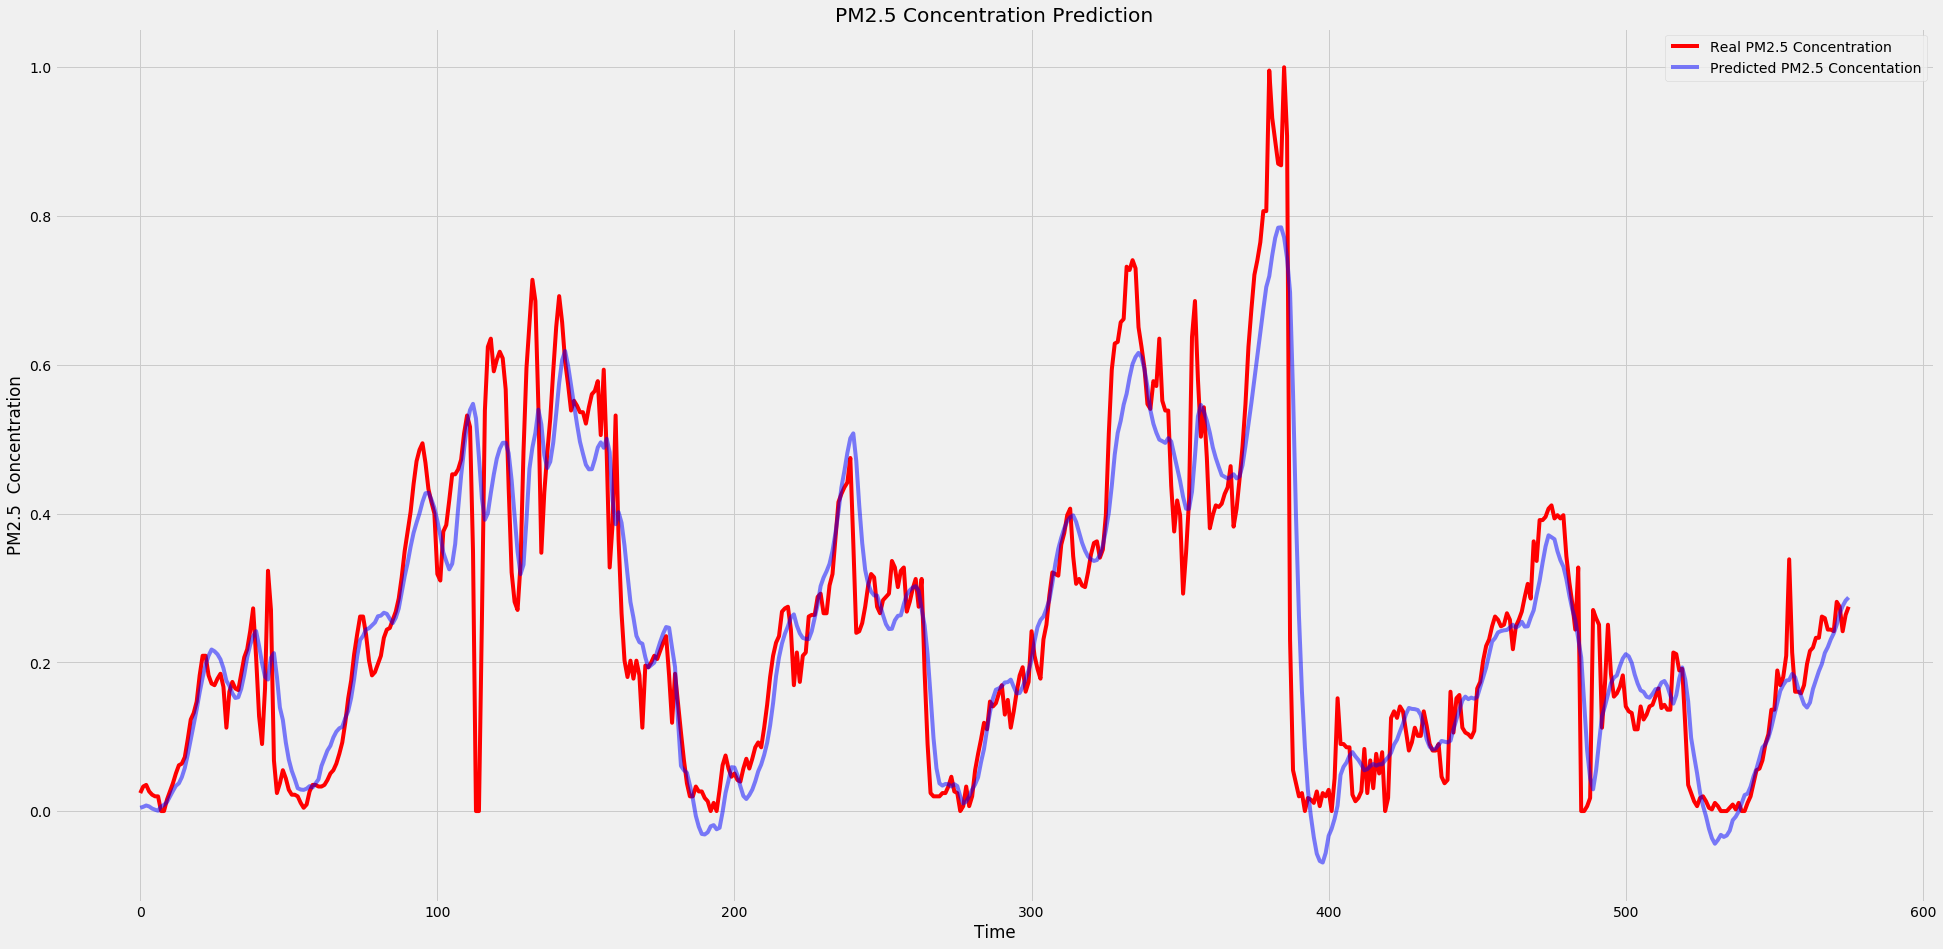

The root mean squared error is 0.08102539113960494.


In [176]:
print('for training set')
y_train_pred = LSTM_GRU_reg.predict(X_train)
plot_predictions(y_train,y_train_pred)
return_rmse(y_train,y_train_pred)

for test set


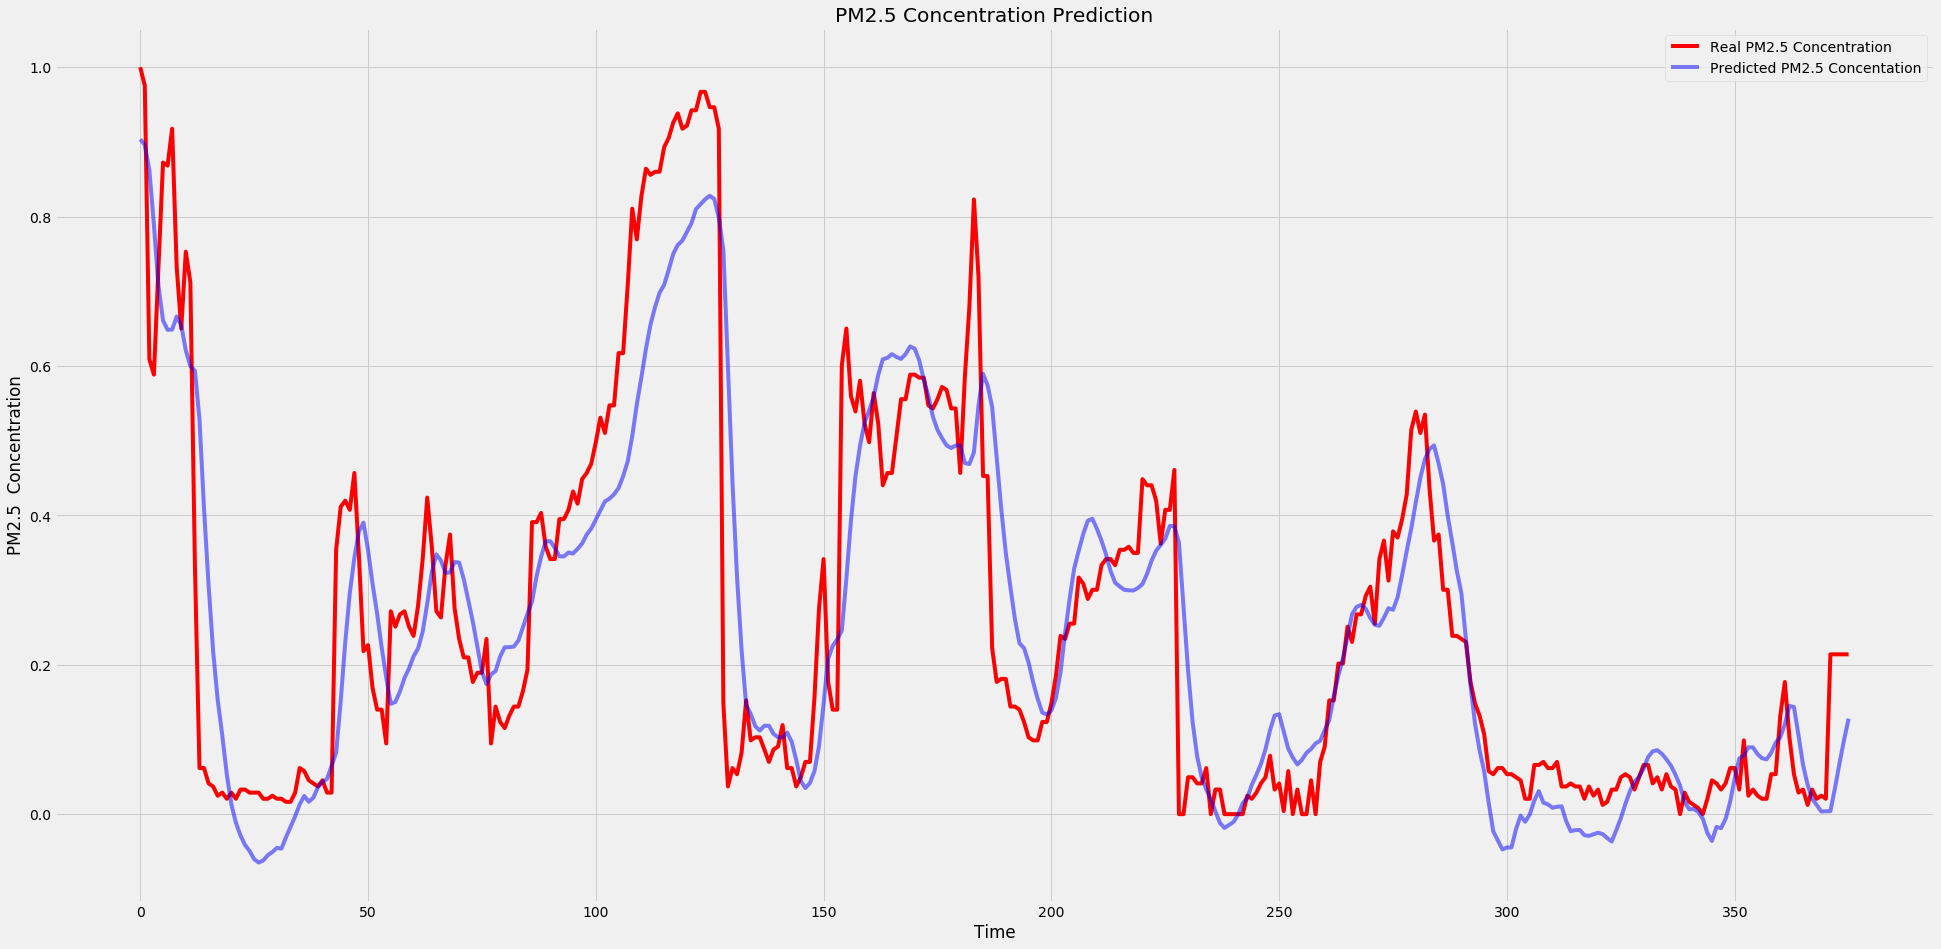

The root mean squared error is 0.11821448824421964.


In [178]:
print('for test set')
y_test_pred = LSTM_GRU_reg.predict(X_test)
plot_predictions(y_test,y_test_pred)
return_rmse(y_test,y_test_pred)

In [179]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
inputs = dataset[len(dataset)-len(test_set) - seq_len:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# Preparing X_test and predicting the prices
X_test = []
for i in range(seq_len,test_size+seq_len):
    X_test.append(inputs[i-seq_len:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],12))
predicted_PM25 = LSTM_GRU_reg.predict(X_test)
predicted_PM25 = sc.inverse_transform(predicted_PM25)


ValueError: non-broadcastable output operand with shape (6784,1) doesn't match the broadcast shape (6784,12)